<a href="https://colab.research.google.com/github/NSmonish/CN_ReasearchParper/blob/main/CN_SleepData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Sleep_data_2022.csv to Sleep_data_2022.csv


In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# For Data Preprocessing

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.utils import resample

# For Machine Learing Models

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import plot_tree
from xgboost import plot_importance
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import learning_curve
from sklearn.metrics import f1_score

# For reporting on the machine learning models

from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
!pip install shap
import shap

In [30]:
data = pd.read_csv("Sleep_data_2022.csv")

In [31]:
df = pd.DataFrame(data)

In [32]:
# Data Pre-Processing

df['dayBPM_imputed'] = df['dayBPM'].fillna(df['dayBPM'].mean())

df = df.dropna(axis=1)

df['awake'] = pd.to_datetime(df['awake'])
df['awake'] = df['awake'].dt.minute + df['awake'].dt.hour * 60

df = df.drop('fellAsleepIn', axis=1)

df['asleep'] = pd.to_datetime(df['asleep'])
df['asleep'] = df['asleep'].dt.minute + df['asleep'].dt.hour * 60

df['asleepAvg7'] = pd.to_datetime(df['asleepAvg7'])
df['asleepAvg7'] = df['asleepAvg7'].dt.minute + df['asleepAvg7'].dt.hour * 60 +df['asleepAvg7'].dt.second/60

df['quality'] = pd.to_datetime(df['quality'])
df['quality'] = df['quality'].dt.minute + df['quality'].dt.hour * 60 + df['quality'].dt.second/60

df['qualityAvg7'] = pd.to_datetime(df['qualityAvg7'])
df['qualityAvg7'] = df['qualityAvg7'].dt.minute + df['qualityAvg7'].dt.hour * 60 + df['qualityAvg7'].dt.second/60

df['inBed'] = pd.to_datetime(df['inBed'])
df['inBed'] = df['inBed'].dt.minute + df['inBed'].dt.hour * 60

df['sessions'] = df['sessions'].replace({1: 'REM', 2: 'NREM'})

df

<ipython-input-32-643d27e0cb76>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['awake'] = pd.to_datetime(df['awake'])
<ipython-input-32-643d27e0cb76>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['awake'] = pd.to_datetime(df['awake'])
<ipython-input-32-643d27e0cb76>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['awake'] = df['awake'].dt.minute + df['awa

,ISO8601,fromDate,toDate,bedtime,waketime,inBed,awake,sessions,asleep,asleepAvg7,efficiency,efficiencyAvg7,quality,qualityAvg7,sleepBPM,sleepBPMAvg7,wakingBPM,wakingBPMAvg7,dayBPM_imputed
0,2022-01-01T20:59:59-07:00,"Friday, Dec 31, 2021","Saturday, Jan 1, 2022",2021-12-31 23:34:00,2022-01-01 07:41:00,487,51,REM,436,437.200000,89.5,92.9,249.783333,331.150000,91.2,65.2,43.0,55.2,73.700000
1,2022-01-02T20:59:59-07:00,"Saturday, Jan 1, 2022","Sunday, Jan 2, 2022",2022-01-01 22:30:00,2022-01-02 07:07:00,517,30,REM,487,445.500000,94.2,93.1,331.766667,331.250000,57.5,63.9,63.0,56.5,65.400000
2,2022-01-03T20:59:59-07:00,"Sunday, Jan 2, 2022","Monday, Jan 3, 2022",2022-01-02 23:01:00,2022-01-03 07:37:00,516,31,REM,485,451.133333,94.0,93.3,377.316667,337.833333,55.8,62.8,53.0,56.0,69.944214
3,2022-01-05T20:59:59-07:00,"Tuesday, Jan 4, 2022","Wednesday, Jan 5, 2022",2022-01-04 22:20:00,2022-01-05 05:22:00,422,7,REM,415,449.000000,98.3,93.2,330.950000,335.066667,57.7,62.5,56.0,55.7,68.800000
4,2022-01-06T20:59:59-07:00,"Wednesday, Jan 5, 2022","Thursday, Jan 6, 2022",2022-01-05 22:13:00,2022-01-06 07:18:00,545,35,REM,510,458.133333,93.6,92.7,407.266667,348.783333,58.2,62.8,60.0,56.3,72.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2022-12-26T20:59:59-07:00,"Sunday, Dec 25, 2022","Monday, Dec 26, 2022",2022-12-25 21:15:00,2022-12-26 00:00:00,165,0,REM,165,386.416667,100.0,94.6,118.983333,294.433333,64.0,57.6,62.0,55.7,65.200000
344,2022-12-27T20:59:59-07:00,"Monday, Dec 26, 2022","Tuesday, Dec 27, 2022",2022-12-27 00:02:00,2022-12-27 06:31:00,389,10,REM,379,376.850000,97.4,96.1,279.550000,290.200000,60.1,57.8,59.0,55.9,70.000000
345,2022-12-28T20:59:59-07:00,"Tuesday, Dec 27, 2022","Wednesday, Dec 28, 2022",2022-12-27 21:00:00,2022-12-28 07:45:00,645,65,REM,580,389.850000,89.9,95.4,424.316667,294.050000,55.6,57.7,52.0,55.4,63.400000
346,2022-12-29T20:59:59-07:00,"Wednesday, Dec 28, 2022","Thursday, Dec 29, 2022",2022-12-28 22:45:00,2022-12-29 06:57:00,492,5,REM,487,420.850000,99.0,95.2,420.000000,326.250000,52.8,57.4,52.0,55.6,64.500000


In [33]:
# Data Processing

min_sleep_duration = 7
min_sleep_efficiency = 80
max_awake_time = 60
min_sleep_quality = 360
min_sleep_BPM = 40
max_sleep_BPM = 100
min_day_BPM = 60
max_day_BPM = 100

# Create the "outcome" column
df['outcome'] = df.apply(lambda row: 1 if (
    row['asleepAvg7'] >= min_sleep_duration*60 and
    row['efficiencyAvg7'] >= min_sleep_efficiency and
    row['awake'] <= max_awake_time and
    row['qualityAvg7'] <= min_sleep_quality and
    row['sleepBPMAvg7'] >= min_sleep_BPM and
    row['sleepBPMAvg7'] <= max_sleep_BPM and
    row['dayBPM_imputed'] >= min_day_BPM and
    row['dayBPM_imputed'] <= max_day_BPM
) else 0, axis=1)

df

,ISO8601,fromDate,toDate,bedtime,waketime,inBed,awake,sessions,asleep,asleepAvg7,efficiency,efficiencyAvg7,quality,qualityAvg7,sleepBPM,sleepBPMAvg7,wakingBPM,wakingBPMAvg7,dayBPM_imputed,outcome
0,2022-01-01T20:59:59-07:00,"Friday, Dec 31, 2021","Saturday, Jan 1, 2022",2021-12-31 23:34:00,2022-01-01 07:41:00,487,51,REM,436,437.200000,89.5,92.9,249.783333,331.150000,91.2,65.2,43.0,55.2,73.700000,1
1,2022-01-02T20:59:59-07:00,"Saturday, Jan 1, 2022","Sunday, Jan 2, 2022",2022-01-01 22:30:00,2022-01-02 07:07:00,517,30,REM,487,445.500000,94.2,93.1,331.766667,331.250000,57.5,63.9,63.0,56.5,65.400000,1
2,2022-01-03T20:59:59-07:00,"Sunday, Jan 2, 2022","Monday, Jan 3, 2022",2022-01-02 23:01:00,2022-01-03 07:37:00,516,31,REM,485,451.133333,94.0,93.3,377.316667,337.833333,55.8,62.8,53.0,56.0,69.944214,1
3,2022-01-05T20:59:59-07:00,"Tuesday, Jan 4, 2022","Wednesday, Jan 5, 2022",2022-01-04 22:20:00,2022-01-05 05:22:00,422,7,REM,415,449.000000,98.3,93.2,330.950000,335.066667,57.7,62.5,56.0,55.7,68.800000,1
4,2022-01-06T20:59:59-07:00,"Wednesday, Jan 5, 2022","Thursday, Jan 6, 2022",2022-01-05 22:13:00,2022-01-06 07:18:00,545,35,REM,510,458.133333,93.6,92.7,407.266667,348.783333,58.2,62.8,60.0,56.3,72.700000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2022-12-26T20:59:59-07:00,"Sunday, Dec 25, 2022","Monday, Dec 26, 2022",2022-12-25 21:15:00,2022-12-26 00:00:00,165,0,REM,165,386.416667,100.0,94.6,118.983333,294.433333,64.0,57.6,62.0,55.7,65.200000,0
344,2022-12-27T20:59:59-07:00,"Monday, Dec 26, 2022","Tuesday, Dec 27, 2022",2022-12-27 00:02:00,2022-12-27 06:31:00,389,10,REM,379,376.850000,97.4,96.1,279.550000,290.200000,60.1,57.8,59.0,55.9,70.000000,0
345,2022-12-28T20:59:59-07:00,"Tuesday, Dec 27, 2022","Wednesday, Dec 28, 2022",2022-12-27 21:00:00,2022-12-28 07:45:00,645,65,REM,580,389.850000,89.9,95.4,424.316667,294.050000,55.6,57.7,52.0,55.4,63.400000,0
346,2022-12-29T20:59:59-07:00,"Wednesday, Dec 28, 2022","Thursday, Dec 29, 2022",2022-12-28 22:45:00,2022-12-29 06:57:00,492,5,REM,487,420.850000,99.0,95.2,420.000000,326.250000,52.8,57.4,52.0,55.6,64.500000,1


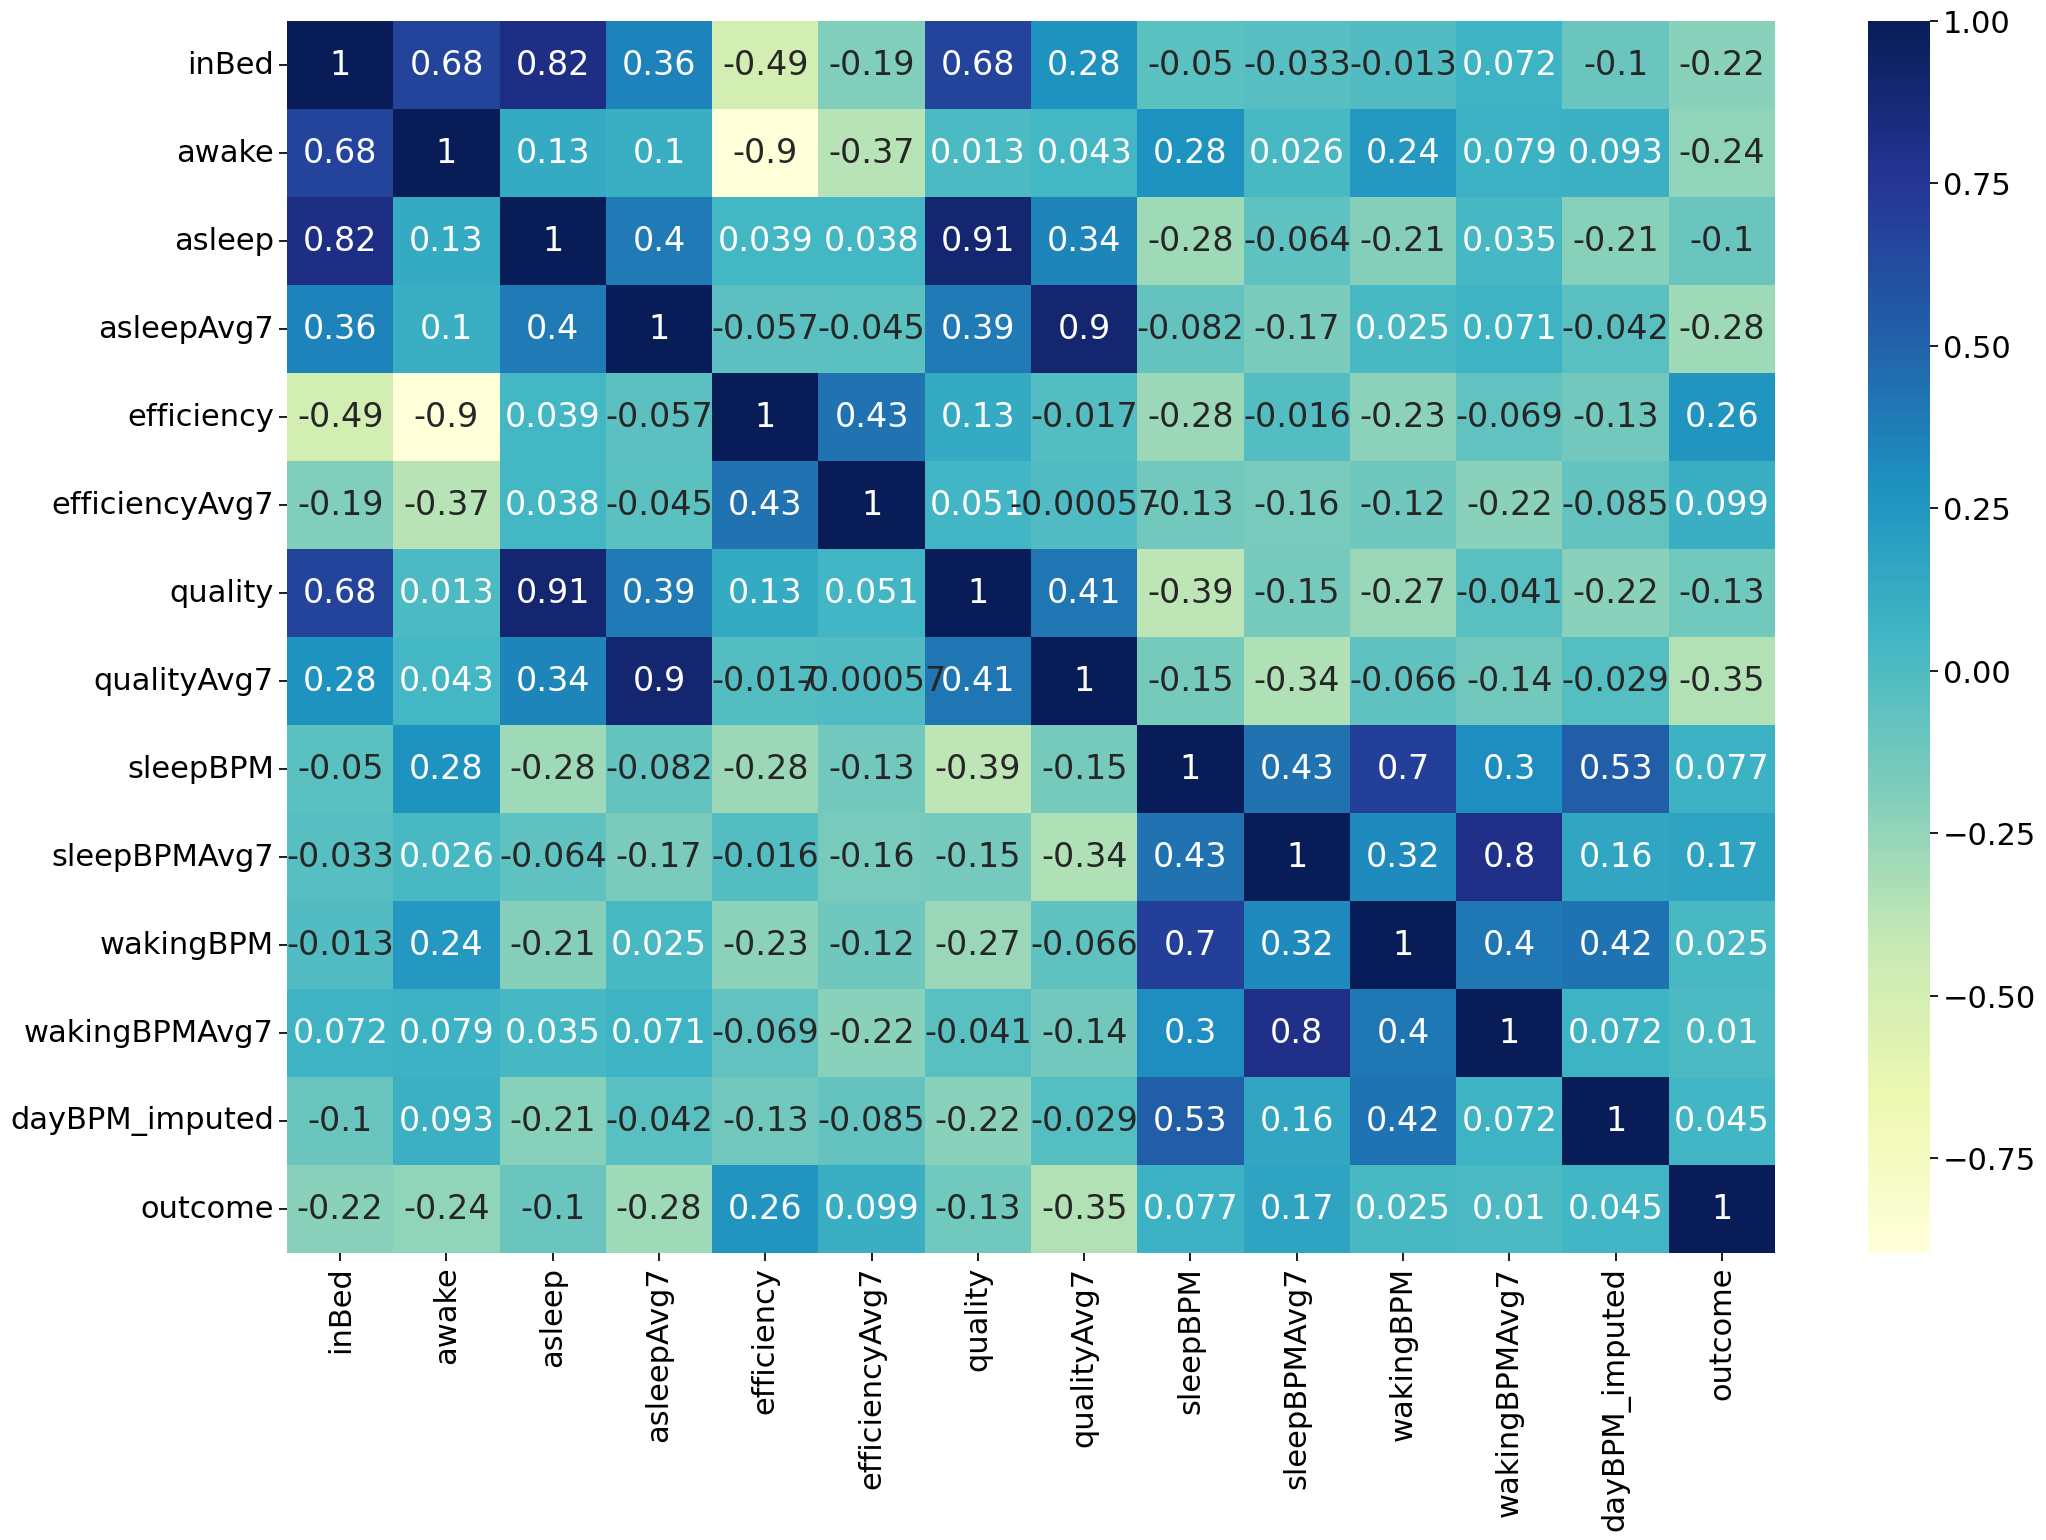

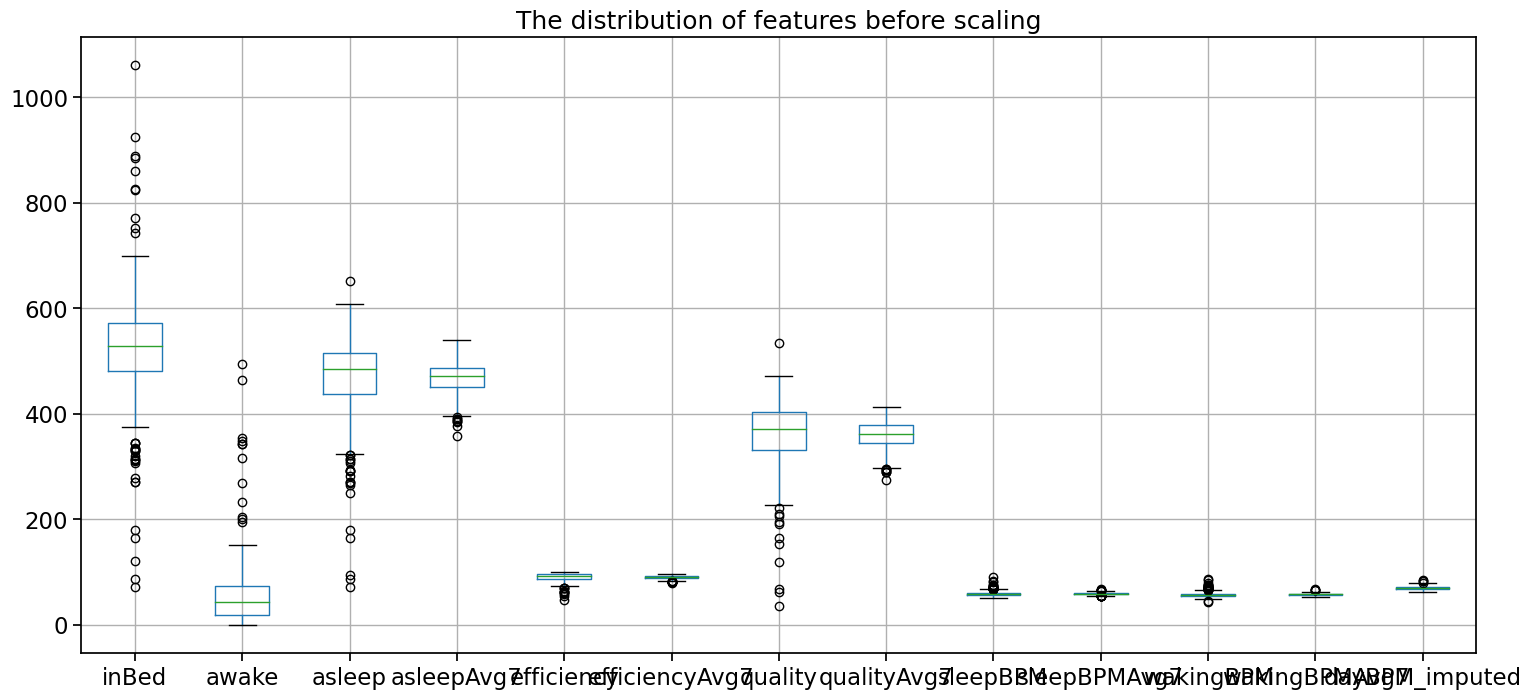

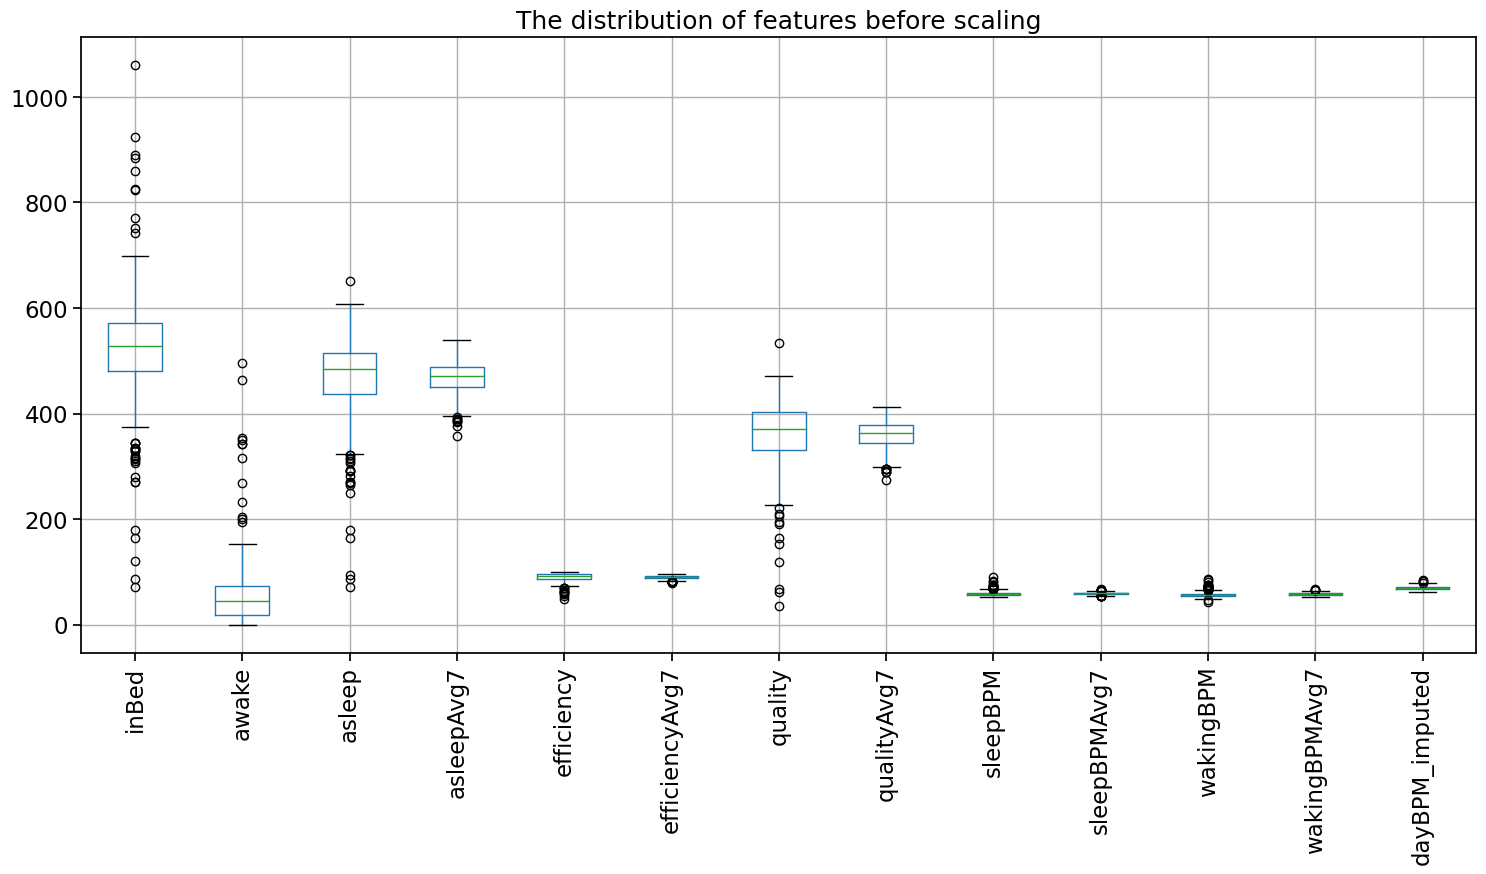

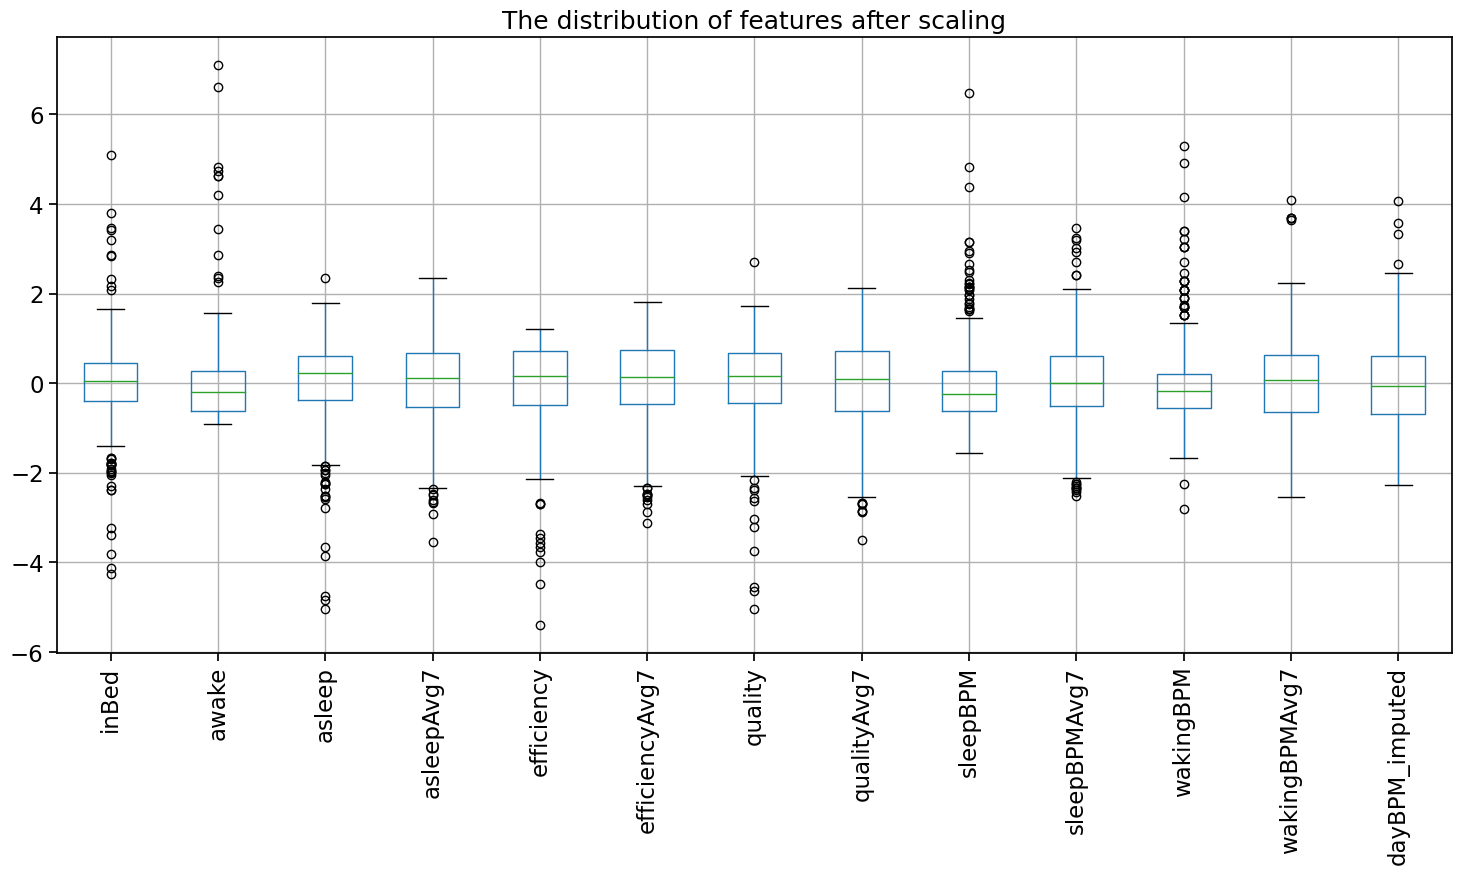

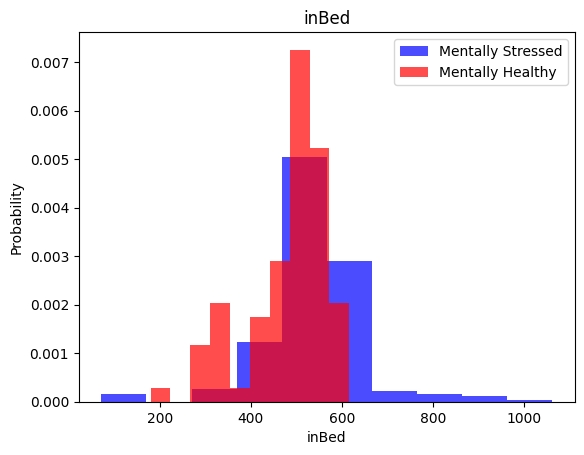

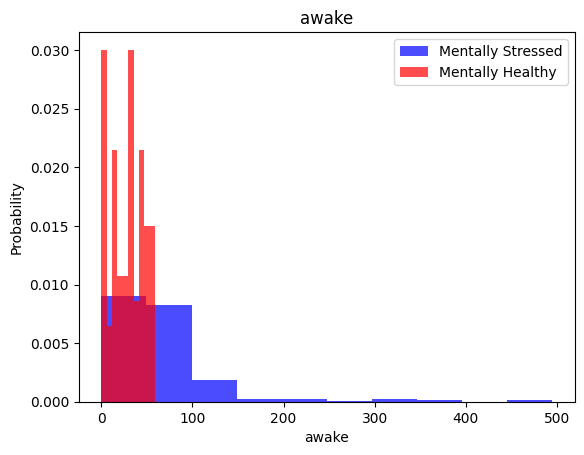

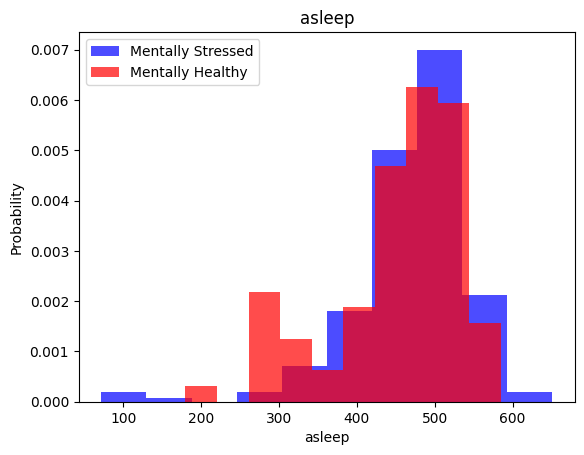

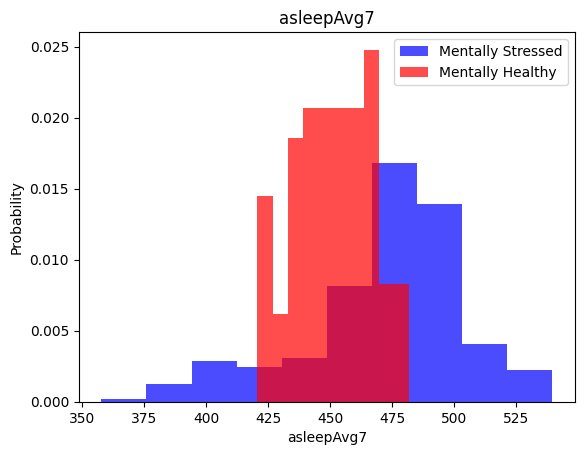

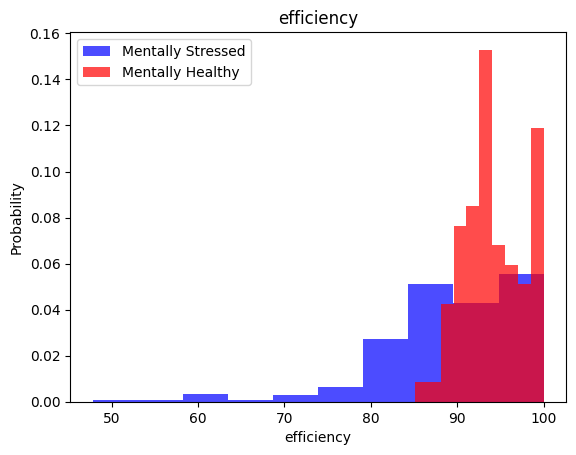

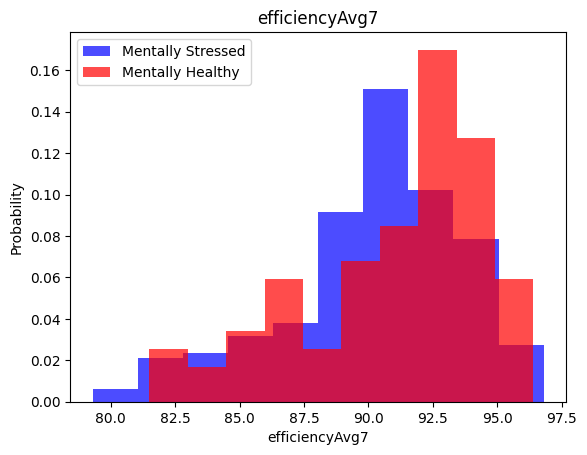

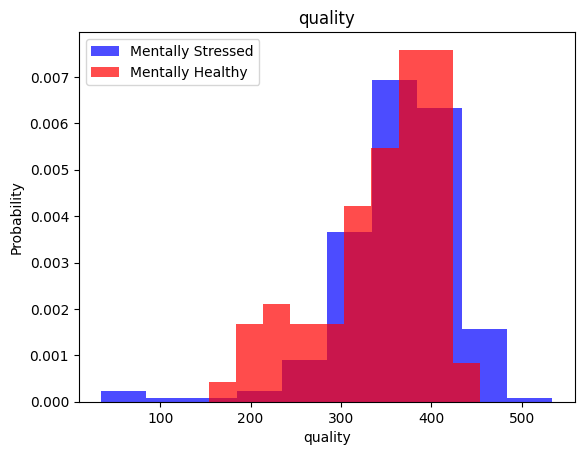

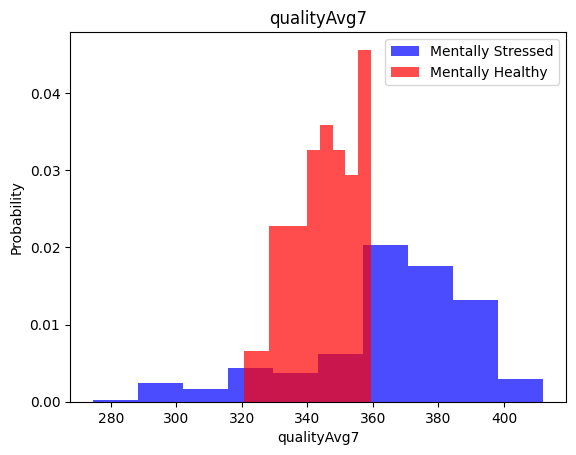

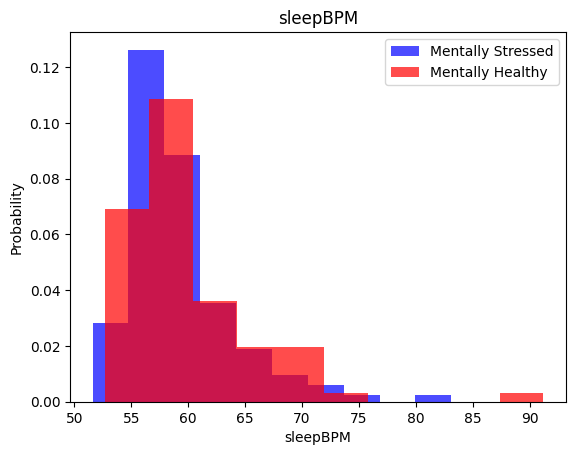

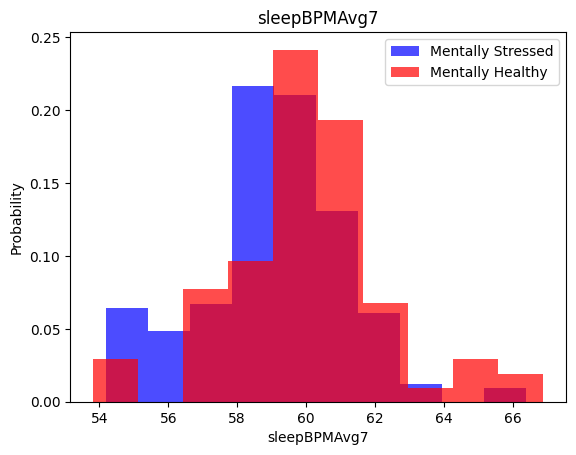

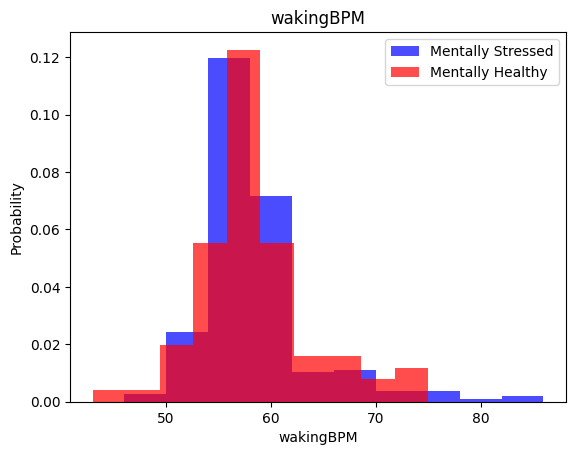

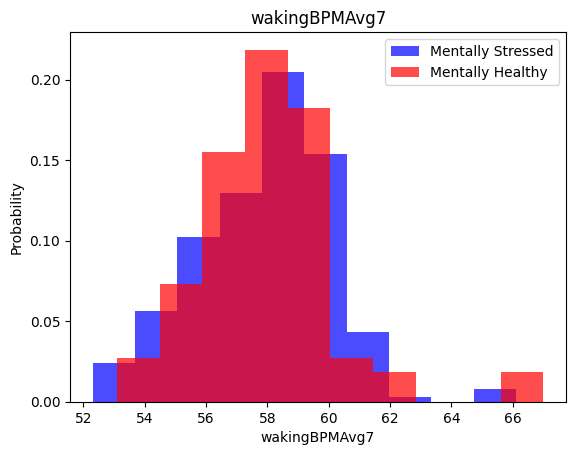

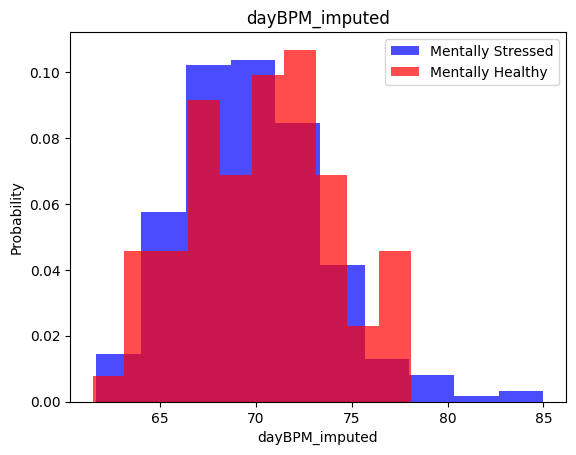

In [53]:
# Data Visualization

# Correlation matrix
corrMatrix = df.corr(numeric_only=True)
plt.figure(figsize=[24,16])
with sns.plotting_context("notebook",font_scale=2):
  sns.heatmap(corrMatrix, cmap="YlGnBu", annot=True)
plt.show()

# Distribution Features
plt.figure(figsize=[18,8])
with sns.plotting_context("notebook",font_scale=1.5):
  niddk_df.boxplot(column=niddk_df.columns.values.tolist()[:-1])
  plt.title("The distribution of features before scaling")
plt.show()

import matplotlib.pyplot as plt
plt.figure(figsize=[18,8])
with sns.plotting_context("notebook",font_scale=1.5):
  niddk_df.boxplot(column=niddk_df.columns.values.tolist()[:-1])
  plt.title("The distribution of features before scaling")
  plt.xticks(rotation=90)
plt.show()

def data_scaling_plot(numerical_df):
  scaler = StandardScaler()
  scaled_data = scaler.fit_transform(numerical_df)
  scaled_df = pd.DataFrame(scaled_data, columns=numerical_df.columns)
  return scaled_df
plt.figure(figsize=[18, 8])
with sns.plotting_context("notebook", font_scale=1.5):
  data_scaling_plot(niddk_df).boxplot(column=niddk_df.columns.values.tolist()[:-1])
  plt.title("The distribution of features after scaling")
  plt.xticks(rotation=90)
plt.show()

# Histogram
for label in niddk_df.columns[0:-1]:
    plt.hist(niddk_df[niddk_df["outcome"]==0][label], color = 'blue', label='Mentally Stressed', alpha=0.7, density=True)
    plt.hist(niddk_df[niddk_df["outcome"]==1][label], color = 'red', label='Mentally Healthy', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

              precision    recall  f1-score   support

           0       0.76      0.98      0.86        52
           1       0.67      0.11      0.19        18

    accuracy                           0.76        70
   macro avg       0.71      0.55      0.52        70
weighted avg       0.74      0.76      0.69        70

Accuracy: 0.7571428571428571


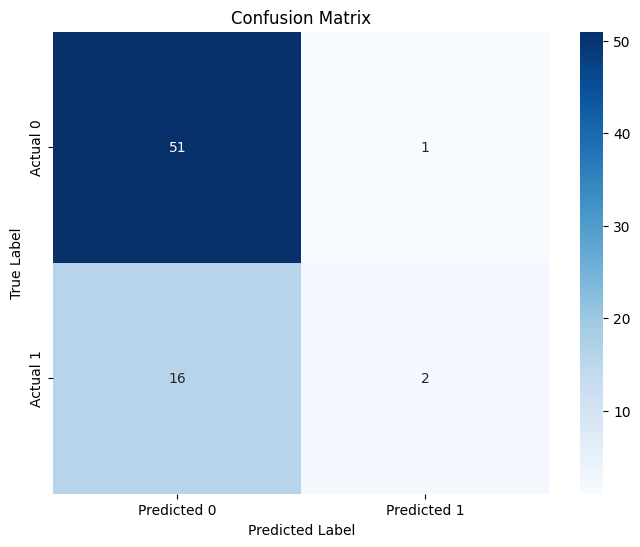

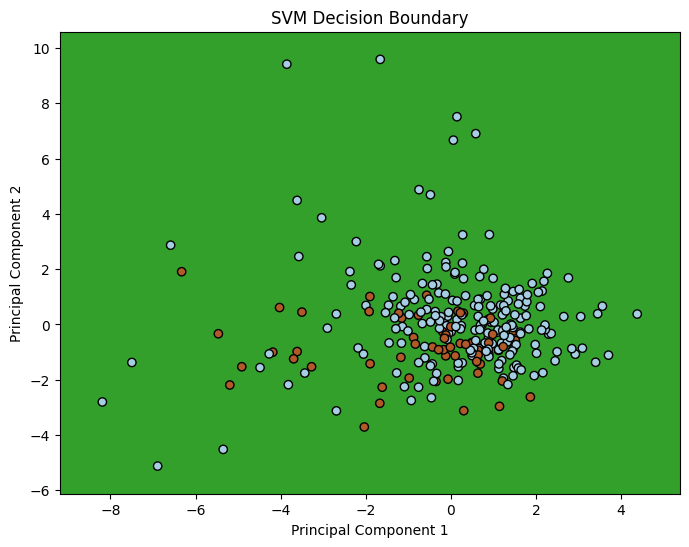

  0%|          | 0/70 [00:00<?, ?it/s]

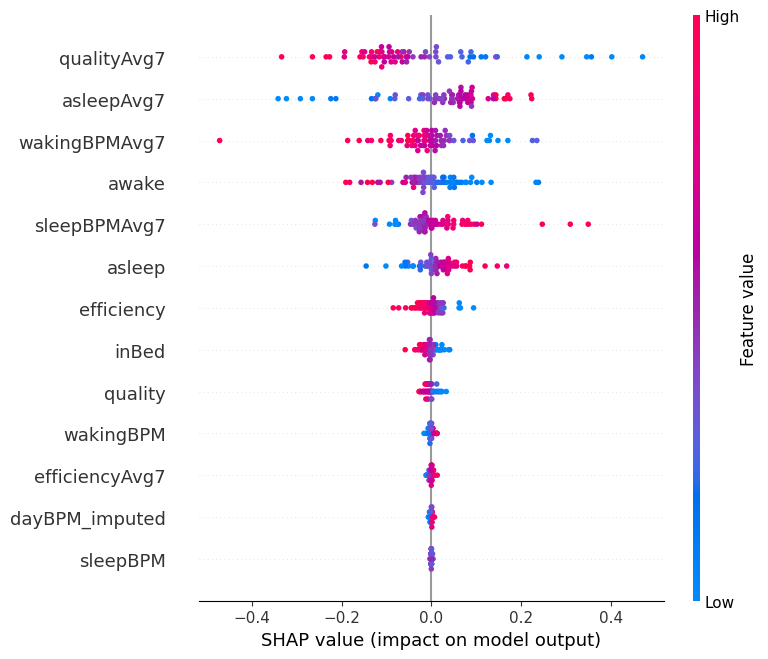

In [36]:
# Implement Support Vector Machine model
X = df.select_dtypes(exclude=['object'])
y = df['outcome']
X = X.drop('outcome', axis=1, errors='ignore')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train an SVM model
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plotting SVM Decision Boundary
fig, ax = plt.subplots(figsize=(8, 6))
pca = PCA(n_components=2)
X_train_reduced = pca.fit_transform(X_train)
svm_model_reduced = SVC(kernel='linear', C=1)
svm_model_reduced.fit(X_train_reduced, y_train)
DecisionBoundaryDisplay.from_estimator(
    svm_model_reduced,
    X_train_reduced,
    response_method="predict",
    cmap=plt.cm.Paired,
    ax=ax,
    xlabel="Principal Component 1",
    ylabel="Principal Component 2",
)
plt.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors="k")
plt.title("SVM Decision Boundary")
plt.show()

# Plot the SHAP summary plot
explainer = shap.KernelExplainer(svm_model.predict, X_train)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

Random Forest Model Evaluation:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        52
           1       1.00      0.89      0.94        18

    accuracy                           0.97        70
   macro avg       0.98      0.94      0.96        70
weighted avg       0.97      0.97      0.97        70

Accuracy: 0.9714285714285714
Confusion Matrix:
 [[52  0]
 [ 2 16]]


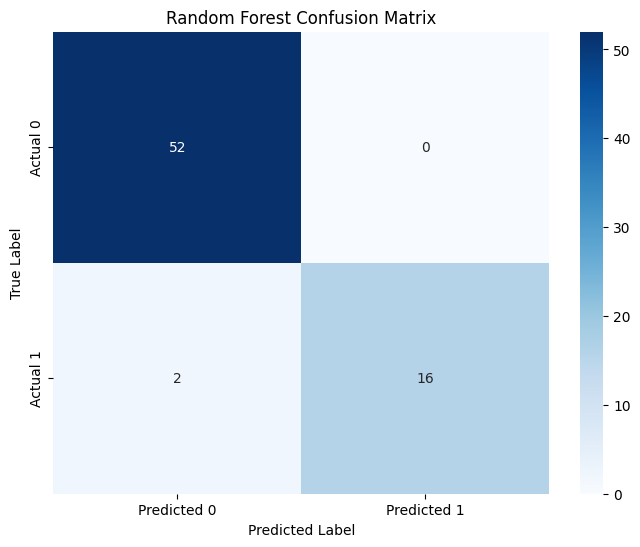

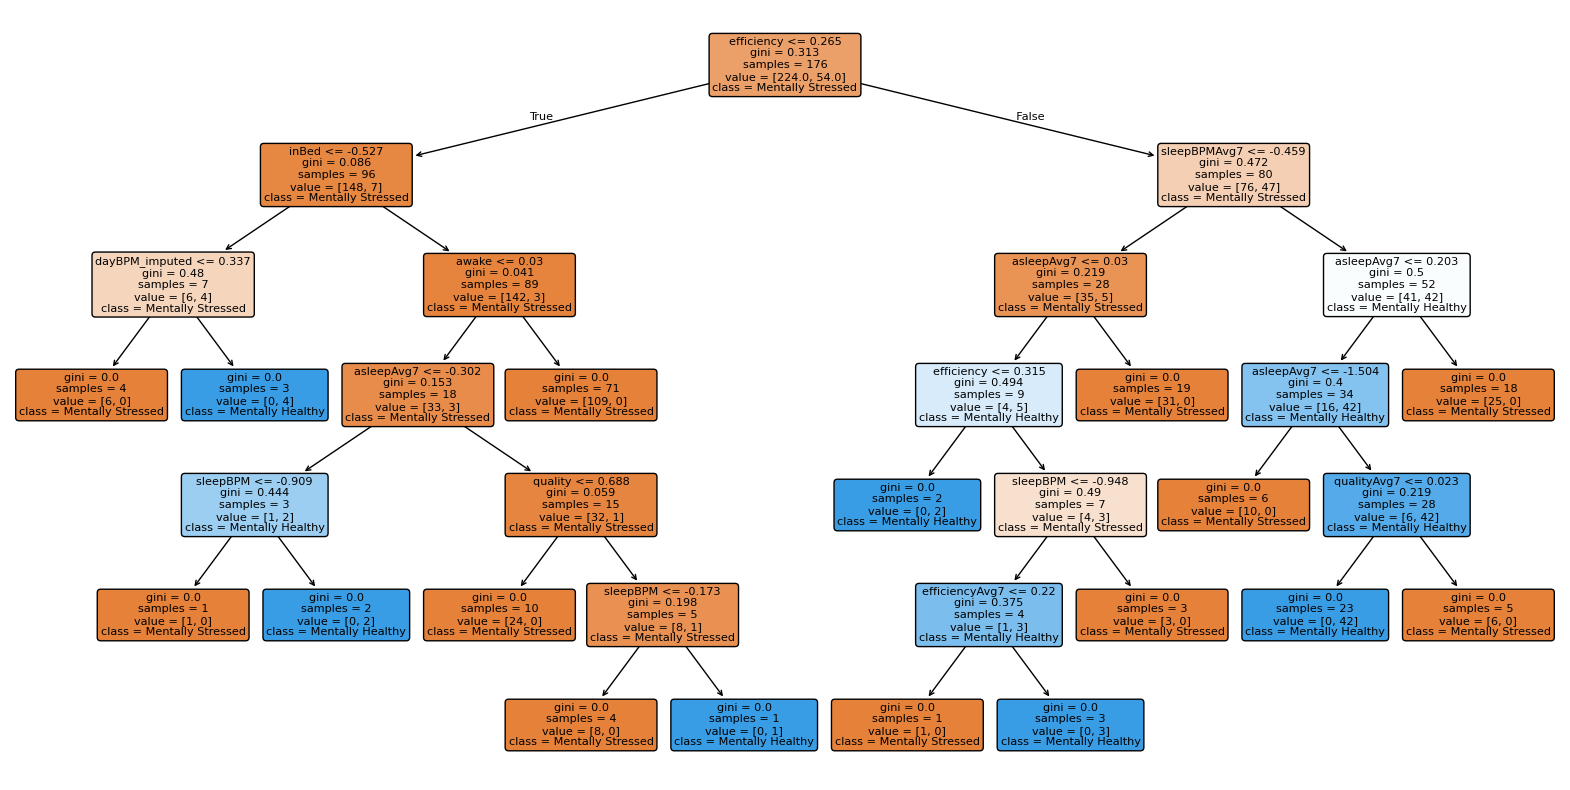

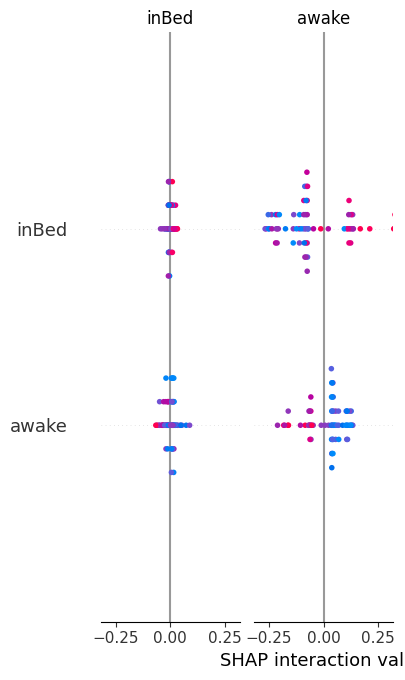

In [38]:
# Implement Random Forest model

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Model Evaluation:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", cm_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot the decision tree
tree = rf_model.estimators_[0]
plt.figure(figsize=(20, 10))
plot_tree(tree,
          feature_names=X.columns,
          class_names=['Mentally Stressed', 'Mentally Healthy'],
          filled=True,
          rounded=True)
plt.show()

# Plot the SHAP summary plot
explainer_rf = shap.TreeExplainer(rf_model)
shap_values_rf = explainer_rf.shap_values(X_test)
shap.summary_plot(shap_values_rf, X_test, feature_names=X.columns)

Decision Tree Model Evaluation:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        52
           1       1.00      0.94      0.97        18

    accuracy                           0.99        70
   macro avg       0.99      0.97      0.98        70
weighted avg       0.99      0.99      0.99        70

Accuracy: 0.9857142857142858
Confusion Matrix:
 [[52  0]
 [ 1 17]]


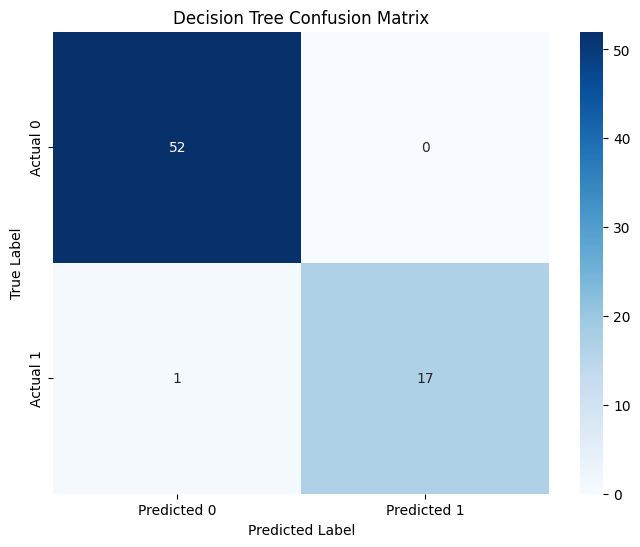

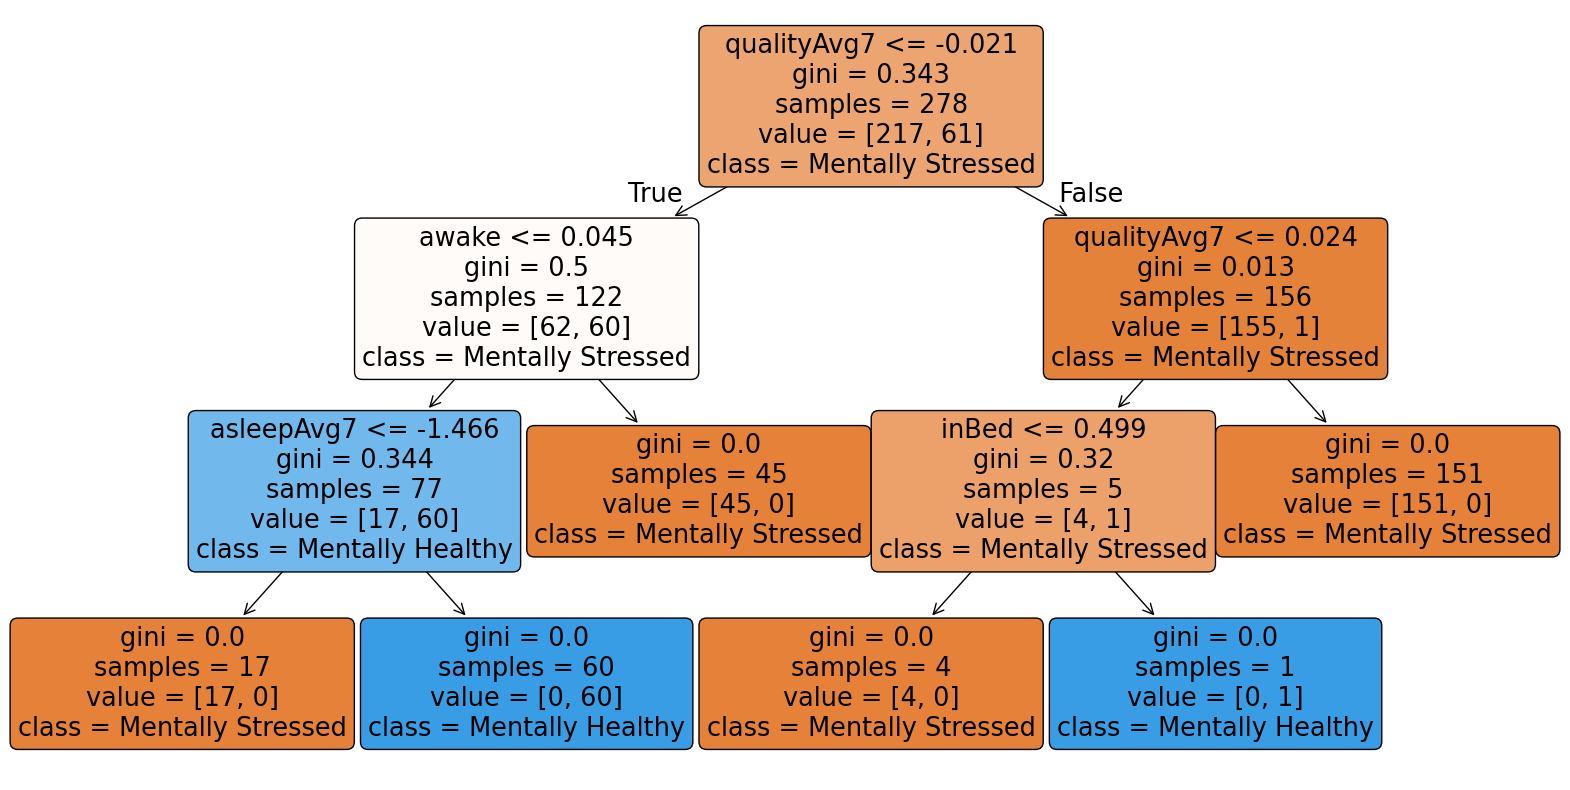

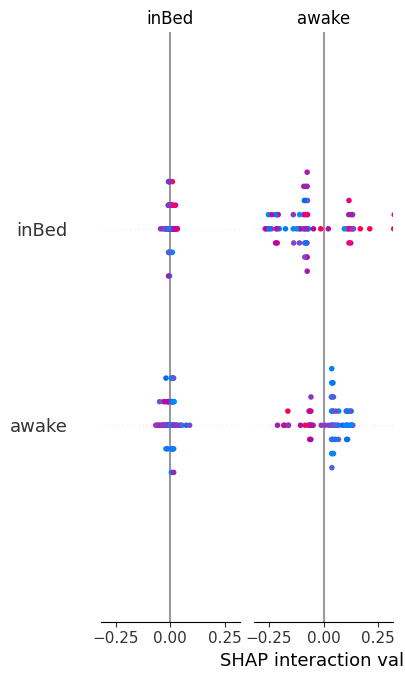

In [39]:
# Implement Decision Tree model

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("Decision Tree Model Evaluation:")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

# Confusion matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:\n", cm_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot the Decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model,
          feature_names=X.columns,
          class_names=['Mentally Stressed', 'Mentally Healthy'],
          filled=True,
          rounded=True)
plt.show()

# Plot the SHAP summary plot
explainer_rf = shap.TreeExplainer(rf_model)
shap_values_rf = explainer_rf.shap_values(X_test)
shap.summary_plot(shap_values_rf, X_test, feature_names=X.columns)

Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
XGBoost Model Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        18

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70

Accuracy: 1.0
Confusion Matrix:
 [[52  0]
 [ 0 18]]


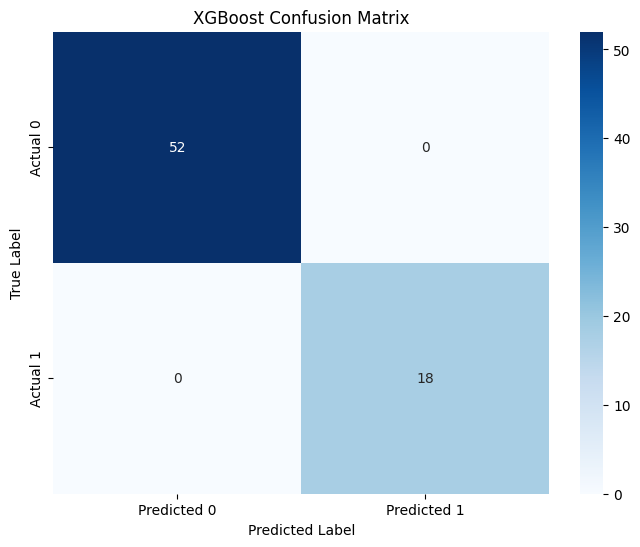

<Figure size 1000x600 with 0 Axes>

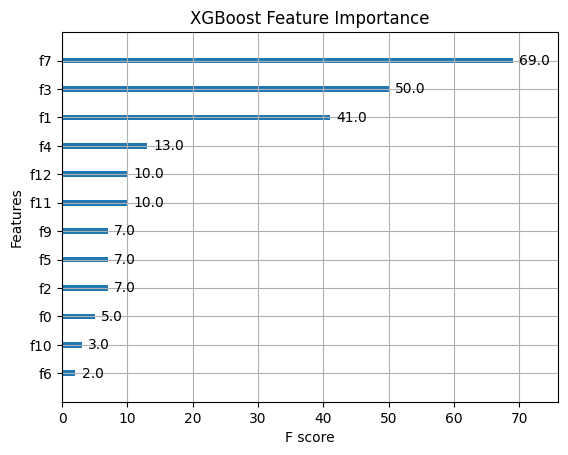

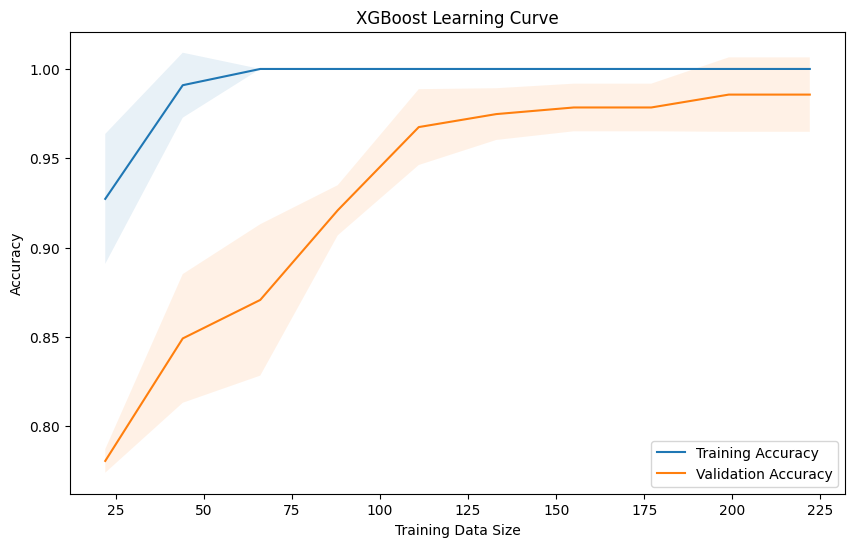

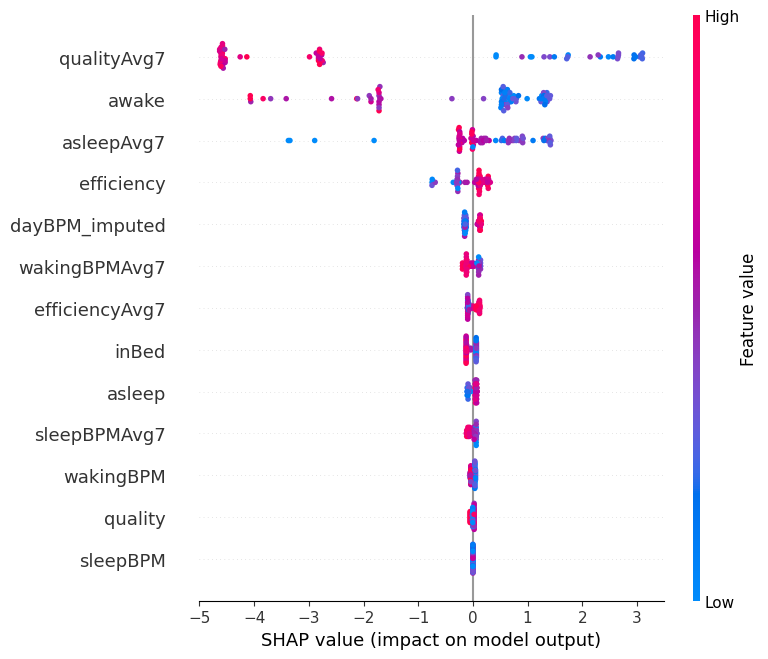

In [40]:
# Implement XGboost model

xgb_model = XGBClassifier(
    learning_rate=0.1,  # Adjust learning rate for convergence
    n_estimators=100,  # Number of boosting rounds
    max_depth=3,  # Limit tree depth to prevent overfitting
    subsample=0.8,  # Fraction of samples used for training each tree
    colsample_bytree=0.8,  # Fraction of features used for training each tree
    reg_alpha=0.1,  # L1 regularization
    reg_lambda=0.1,  # L2 regularization
    random_state=42
)

# Use cross-validation to find the best hyperparameters
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)
best_xgb_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# Fit the XGBoost model to the training data
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Model Evaluation:")
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))

# Confusion matrix for XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix:\n", cm_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot feature importance
plt.figure(figsize=(10, 6))
plot_importance(xgb_model)
plt.title("XGBoost Feature Importance")
plt.show()

# Plot the learning curve of the XGBoost model
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    xgb_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, test_mean, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Training Data Size')
plt.ylabel('Accuracy')
plt.title('XGBoost Learning Curve')
plt.legend(loc='best')
plt.show()

# Plot the SHAP summary plot
explainer_xgb = shap.TreeExplainer(xgb_model)
shap_values_xgb = explainer_xgb.shap_values(X_test)
shap.summary_plot(shap_values_xgb, X_test, feature_names=X.columns)

In [45]:
df_numerical = df.select_dtypes(exclude=['object'])
niddk_df = df_numerical.copy()
niddk_df

,inBed,awake,asleep,asleepAvg7,efficiency,efficiencyAvg7,quality,qualityAvg7,sleepBPM,sleepBPMAvg7,wakingBPM,wakingBPMAvg7,dayBPM_imputed,outcome
0,487,51,436,437.200000,89.5,92.9,249.783333,331.150000,91.2,65.2,43.0,55.2,73.700000,1
1,517,30,487,445.500000,94.2,93.1,331.766667,331.250000,57.5,63.9,63.0,56.5,65.400000,1
2,516,31,485,451.133333,94.0,93.3,377.316667,337.833333,55.8,62.8,53.0,56.0,69.944214,1
3,422,7,415,449.000000,98.3,93.2,330.950000,335.066667,57.7,62.5,56.0,55.7,68.800000,1
4,545,35,510,458.133333,93.6,92.7,407.266667,348.783333,58.2,62.8,60.0,56.3,72.700000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,165,0,165,386.416667,100.0,94.6,118.983333,294.433333,64.0,57.6,62.0,55.7,65.200000,0
344,389,10,379,376.850000,97.4,96.1,279.550000,290.200000,60.1,57.8,59.0,55.9,70.000000,0
345,645,65,580,389.850000,89.9,95.4,424.316667,294.050000,55.6,57.7,52.0,55.4,63.400000,0
346,492,5,487,420.850000,99.0,95.2,420.000000,326.250000,52.8,57.4,52.0,55.6,64.500000,1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy: 0.8

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.98      0.88        52
           1       0.83      0.28      0.42        18

    accuracy                           0.80        70
   macro avg       0.82      0.63      0.65        70
weighted avg       0.81      0.80      0.76        70


Confusion Matrix:
 [[51  1]
 [13  5]]


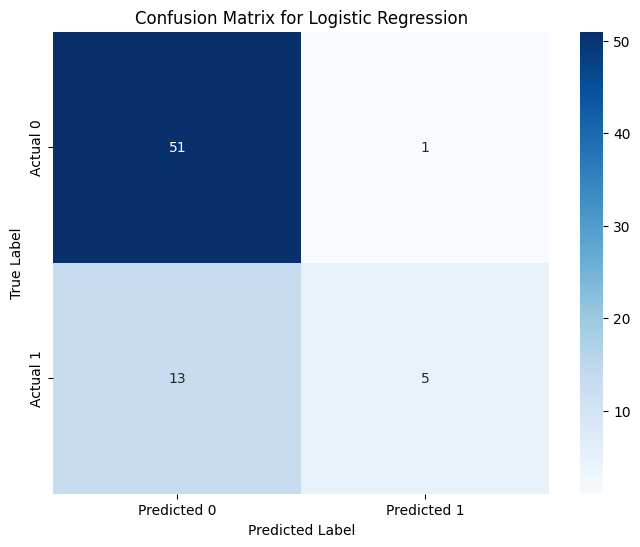

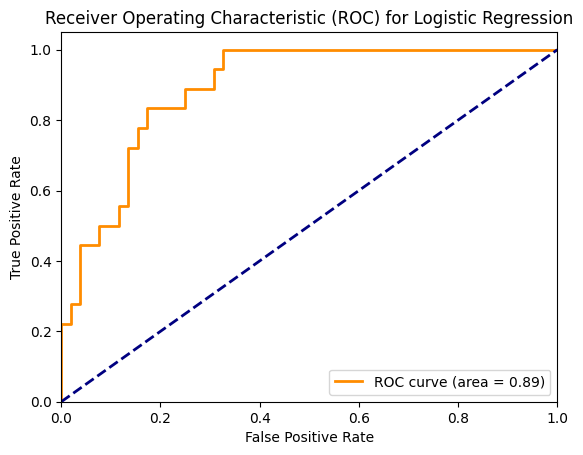

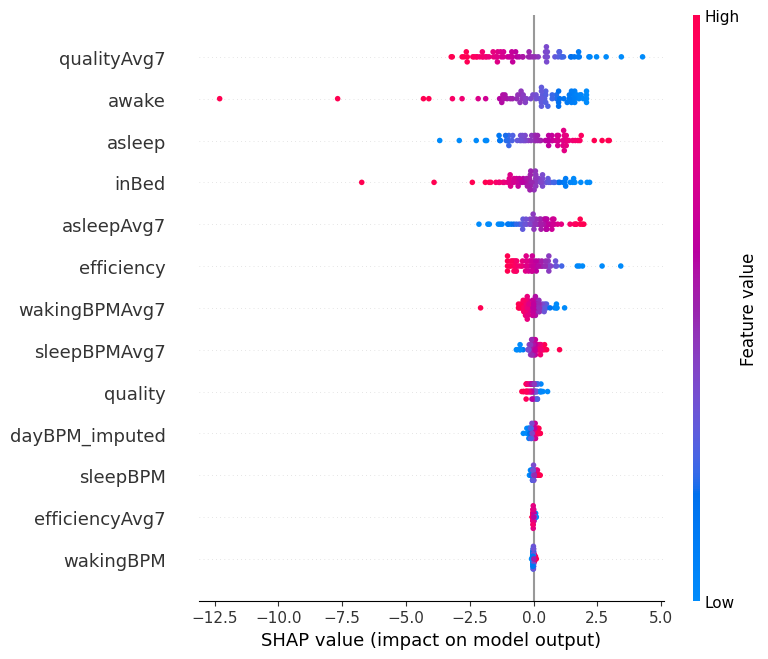

In [46]:
# Implement Logistic Regression model

X = niddk_df.drop('outcome', axis=1)
y = niddk_df['outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Logistic Regression model
logreg_model = LogisticRegressionCV(max_iter=1000)
logreg_model.fit(X_train, y_train)
y_pred = logreg_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# Plot the ROC curve
y_pred_proba = logreg_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

# Summary plot of SHAP values
explainer = shap.Explainer(logreg_model, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

KNN Accuracy: 0.8142857142857143

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.88        52
           1       0.67      0.56      0.61        18

    accuracy                           0.81        70
   macro avg       0.76      0.73      0.74        70
weighted avg       0.81      0.81      0.81        70


KNN Confusion Matrix:
 [[47  5]
 [ 8 10]]


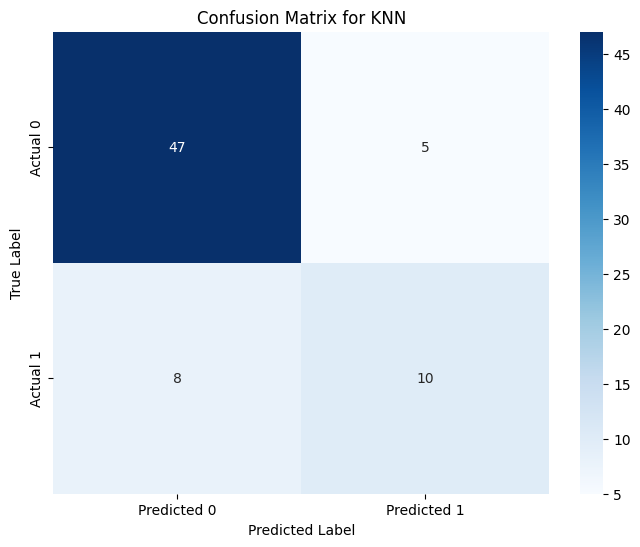

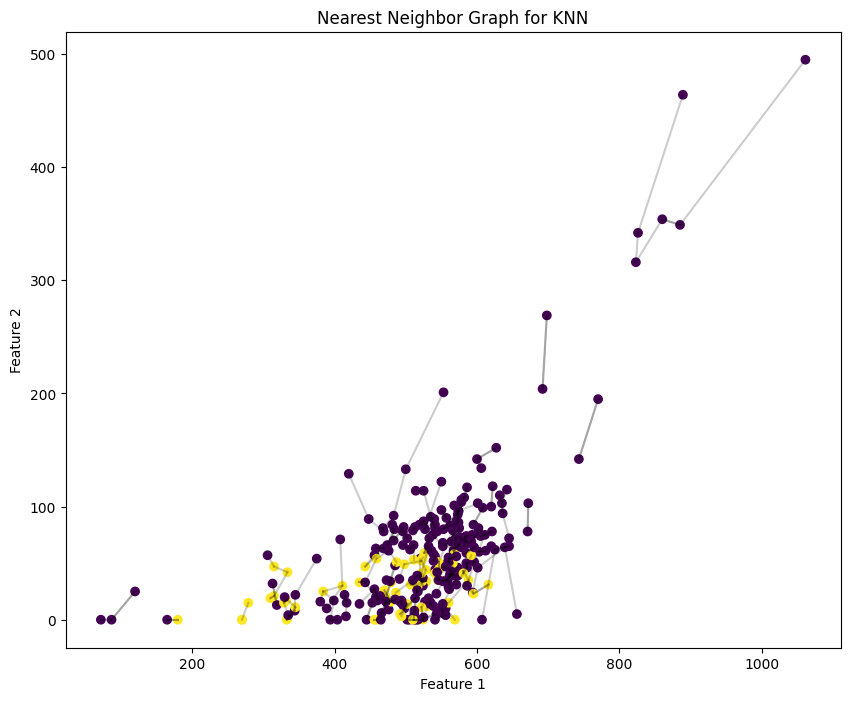

  0%|          | 0/70 [00:00<?, ?it/s]

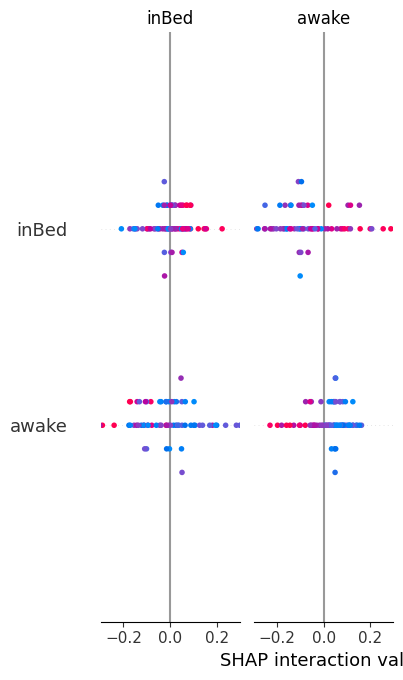

In [48]:
# Implement K-Nearest Neighbours model

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("\nKNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

# COnfusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for KNN')
plt.show()

# Nearest neighbour graph
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X_train)
distances, indices = nbrs.kneighbors(X_train)
plt.figure(figsize=(10, 8))
for i in range(len(X_train)):
    for j in indices[i]:
        if i != j:
            plt.plot([X_train.iloc[i, 0], X_train.iloc[j, 0]],
                     [X_train.iloc[i, 1], X_train.iloc[j, 1]], 'k-', alpha=0.2)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap='viridis')
plt.title('Nearest Neighbor Graph for KNN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Summary plot of SHAP values
explainer_knn = shap.KernelExplainer(knn_model.predict_proba, X_train)
shap_values_knn = explainer_knn.shap_values(X_test)
shap.summary_plot(shap_values_knn, X_test, feature_names=X.columns)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 1.0

AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        18

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70


AdaBoost Confusion Matrix:
 [[52  0]
 [ 0 18]]


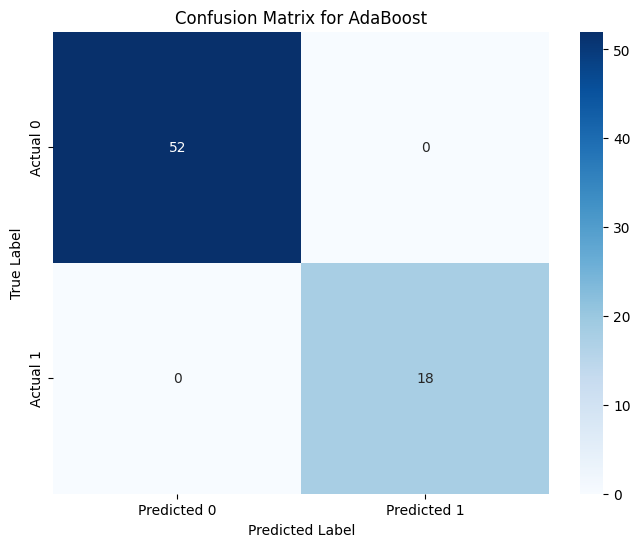

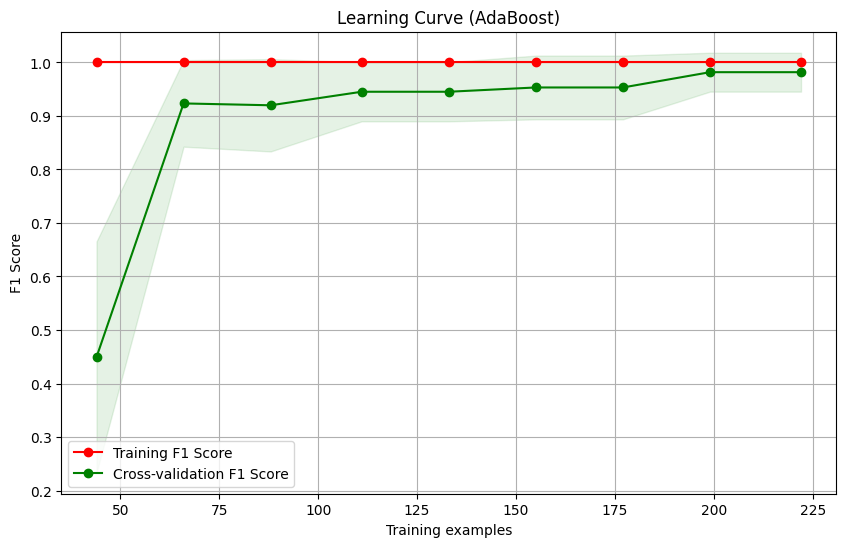

PermutationExplainer explainer: 71it [00:35,  1.63it/s]


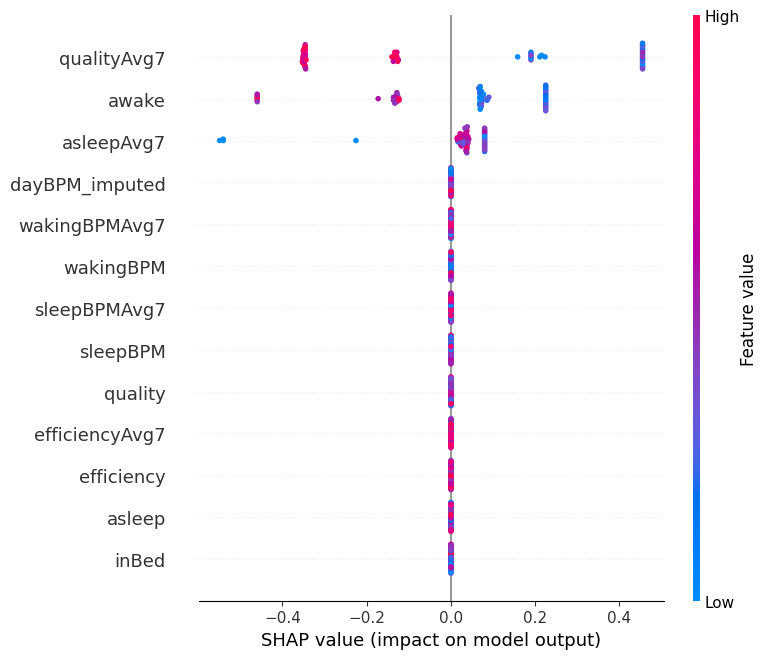

In [50]:
# Implement Adaboost model

adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_model.fit(X_train, y_train)
y_pred_adaboost = adaboost_model.predict(X_test)

# Evaluate the model
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_adaboost))
print("\nAdaBoost Classification Report:\n", classification_report(y_test, y_pred_adaboost))
print("\nAdaBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_adaboost))


# Confusion Matrix
cm_adaboost = confusion_matrix(y_test, y_pred_adaboost)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_adaboost, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for AdaBoost')
plt.show()

# Plot graph for the above adaboost model
train_sizes, train_scores, test_scores = learning_curve(
    adaboost_model, X_train, y_train, cv=5, scoring='f1', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training F1 Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation F1 Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.xlabel("Training examples")
plt.ylabel("F1 Score")
plt.title("Learning Curve (AdaBoost)")
plt.legend(loc="best")
plt.grid(True)
plt.show()

# Summary plot of SHAP values
explainer_adaboost = shap.Explainer(adaboost_model.predict, X_train)
shap_values_adaboost = explainer_adaboost(X_test)
shap.summary_plot(shap_values_adaboost, X_test, feature_names=X_test.columns)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.5144 - loss: 19.8758 - val_accuracy: 0.8571 - val_loss: 10.4304
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7100 - loss: 11.5914 - val_accuracy: 0.2143 - val_loss: 3.9786
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5726 - loss: 4.6509 - val_accuracy: 0.8214 - val_loss: 2.5094
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6002 - loss: 2.7363 - val_accuracy: 0.8393 - val_loss: 2.5599
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6902 - loss: 2.3294 - val_accuracy: 0.8214 - val_loss: 1.9281
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7151 - loss: 2.3166 - val_accuracy: 0.7679 - val_loss: 1.5190
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7076 - loss: 1.8135 - val_accuracy: 0.7679 - val_loss: 1.3178
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7263 - loss: 1.6363 - val_accuracy: 0.7679 - val_loss: 1.17

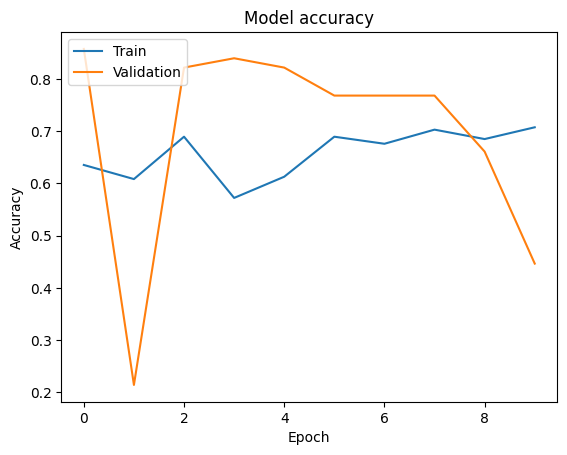

In [51]:
# Implement sequential model using Keras
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer with 64 neurons
    keras.layers.Dense(32, activation='relu'),  # Hidden layer with 32 neurons
    keras.layers.Dense(1, activation='sigmoid')  # Output layer with 1 neuron for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)  # Adjust epochs and batch size as needed

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()